# Practica 1   ofigueroa@ucb.edu.bo


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from pandas import Series, DataFrame
from matplotlib import collections as collections
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sb.set_style('whitegrid')
from numpy import median
from numpy import mean

In [2]:
creditos = pd.read_csv('credit-g1.csv',sep=';')
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,car,31,none,own,1,skilled,2,yes,yes,good
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,no_known_property,31,bank,for_free,1,skilled,1,yes,yes,good
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,car,25,none,own,1,skilled,1,none,yes,good
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,real_estate,56,none,own,1,skilled,1,none,yes,good
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,real_estate,41,none,rent,1,unskilled resident,1,none,yes,good


### 1.	Quitar filas duplicadas

In [3]:
creditos.duplicated().any()  

False

#### Conclusión: No existen duplicados en el dataset

In [4]:
creditos.drop_duplicates(subset=None, inplace=True)  

#### Aplicando la función, el Dataset se mantiene inalterado

In [5]:
creditos.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

### 2.	Quitar columnas duplicadas

In [6]:
creditosSinCR = creditos.T.drop_duplicates().T
creditos.shape

(50, 21)

#### Conclusión: No existen columnas repetidas

### 3. Identificar columnas que tienen valores constantes

In [7]:
def drop_constant_columns(dataframe):
    result = dataframe.copy()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column,axis=1)
    return result

In [8]:
creditosSinCK = drop_constant_columns(creditos)
creditosSinCK.shape  


(50, 21)

####  Conclusión: El Datset no tiene valores constantes

### 4.	Identifique el porcentaje de valores faltantes en las columnas

In [9]:
total = creditos.isnull().sum().sort_values(ascending=False)
porcentaje = (creditos.isnull().sum()/creditos.isnull().count()).sort_values(ascending=False)
faltantes = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
faltantes  

,Total,Porcentaje
class,0,0.0
other_parties,0,0.0
duration,0,0.0
credit_history,0,0.0
purpose,0,0.0
credit_amount,0,0.0
savings_status,0,0.0
employment,0,0.0
installment_commitment,0,0.0
personal_status,0,0.0


#### Conclusión: No existen valores faltantes en el dataset

### 5.	Para el dataset hacer un análisis gráfico documentado de las variables:

#### Histogramas

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'credit_amount'}>,
        <AxesSubplot:title={'center':'installment_commitment'}>],
       [<AxesSubplot:title={'center':'residence_since'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'existing_credits'}>],
       [<AxesSubplot:title={'center':'num_dependents'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

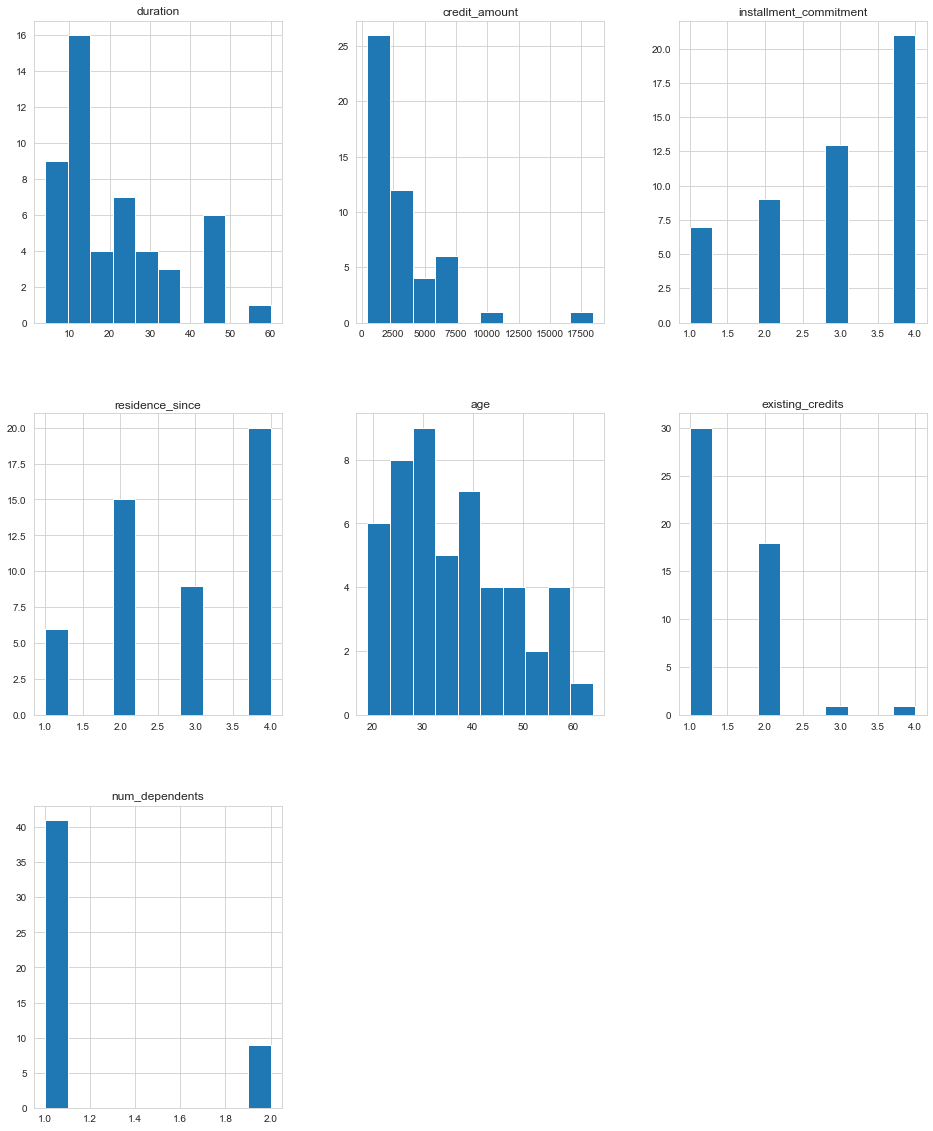

In [10]:
creditos.hist(figsize=(16, 20))

#### Análisis: De las  cuantitativas, las que presentan una distribución aparentemente normal son "duration" y "age".

#### ●  Quartiles

<AxesSubplot:xlabel='job', ylabel='credit_amount'>

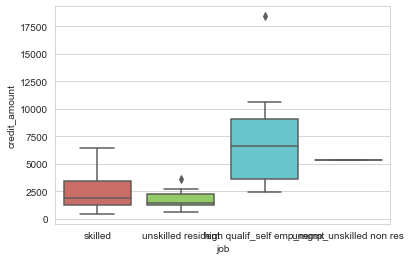

In [11]:
sb.boxplot(x='job', y='credit_amount', data=creditos, palette='hls')

#### Análisis: La subcategoría de Trabajo altamente calificado presenta una media y un IQR superior a los otros tipos de trabajo. Destaca la observación atípica del trabajo que requiere poca capacidad (unskilled resident)

#### ●	Scatter plots


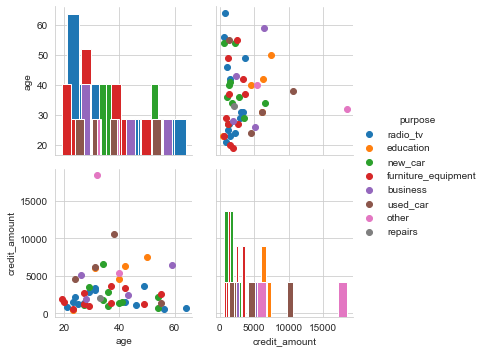

In [12]:
x = sb.PairGrid(creditos, hue='purpose',vars=['age','credit_amount'])
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x = x.add_legend()

#### Análisis: Resaltan los montos altos destinados a créditos para educación en edades superiores a 40 años. Por otro lado, los más jovenes solicitan montos pequeños para equipamiento del hogar o electrodomésticos.

#### ● Distributions


<AxesSubplot:xlabel='age', ylabel='Density'>

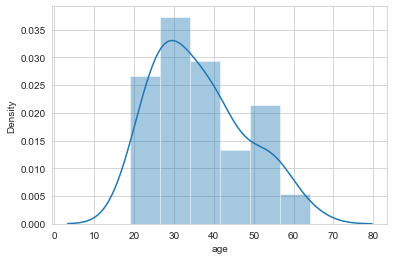

In [13]:
sb.distplot(creditos['age'])

#### ● Boxplots


<AxesSubplot:xlabel='housing', ylabel='age'>

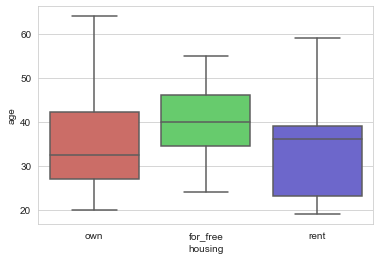

In [14]:
sb.boxplot(x='housing', y='age', data=creditos, palette='hls')

#### ● Bar plot


<AxesSubplot:xlabel='credit_amount', ylabel='purpose'>

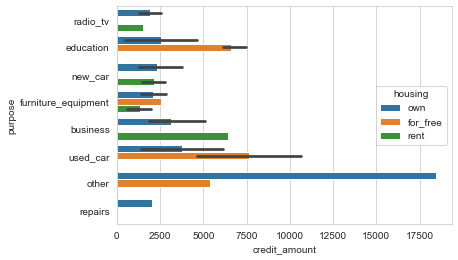

In [15]:
sb.barplot(y='purpose', x='credit_amount', data=creditos, orient = 'h', hue ='housing')

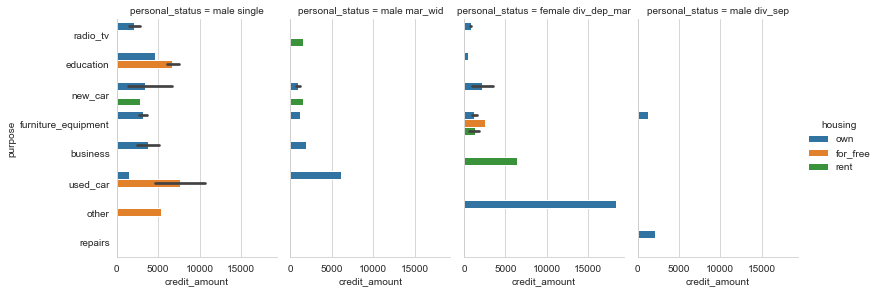

In [16]:
sb.catplot(x="credit_amount", y="purpose",
                hue="housing", col="personal_status",
                data=creditos, kind="bar",
                height=4, aspect=.7);

#### Análisis: En el primer gráfico los montos más grandes corresponden a propósitos varios. Sin embargo, graficando por el estado civil, se evidencia que los hombres solteros y las mujeres divorciadas solicitan créditos altos para propósitos varios. Destaca que los hombres divorciados no solicitan fuertes cantidades de créditos y éstos estan destinados a reparaciones y equipo del hogar.

#### ● Heatmaps

<AxesSubplot:xlabel='age', ylabel='duration'>

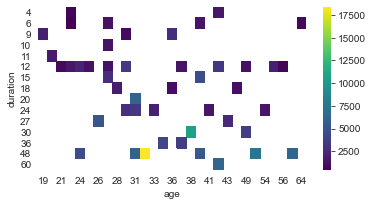

In [17]:
f, ax = plt.subplots(figsize=(6, 3))
creditosHeatMap=creditos[['credit_amount','age','duration']]
heatmap1_data = pd.pivot_table(creditosHeatMap, values='credit_amount', 
                     index=['duration'], 
                     columns='age')
sb.heatmap(heatmap1_data, cmap="viridis")


#### Análisis: Visualizando las variables Edad, Duración del Crédito y Monto del préstamo, se refuerza la conclusión de que los montos mas altos de otorgación de créditos se destinan a personas adultas entre 30 y 40 años, con una duración mas prolongada.

### 6.	Aplicar expresión matemática para el cálculo (CreditAmount / Duración)*residence_since

In [18]:
creditos['NuevaVariable']=(creditos['credit_amount']/creditos['duration'])*creditos['residence_since']
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,NuevaVariable
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,31,none,own,1,skilled,2,yes,yes,good,285.833333
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,31,bank,for_free,1,skilled,1,yes,yes,good,381.875000
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,25,none,own,1,skilled,1,none,yes,good,210.333333
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,56,none,own,1,skilled,1,none,yes,good,206.000000
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,41,none,rent,1,unskilled resident,1,none,yes,good,244.833333


### 7.	Discretizar duración, credit_amount, age, number_of_dependents.

#### Duration


In [19]:
bins = [0, 20, 40, 70] 
grupos = ['corto', 'mediano', 'largo']
creditos['plazo'] =  pd.cut(creditos['duration'], bins, labels=grupos)
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,NuevaVariable,plazo
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,none,own,1,skilled,2,yes,yes,good,285.833333,mediano
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,bank,for_free,1,skilled,1,yes,yes,good,381.875000,largo
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,none,own,1,skilled,1,none,yes,good,210.333333,corto
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,none,own,1,skilled,1,none,yes,good,206.000000,corto
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,none,rent,1,unskilled resident,1,none,yes,good,244.833333,mediano


#### credito amount

In [20]:
bins = [0, 7000, 14000, 20000] 
grupos = ['minimo', 'normal', 'grande']
creditos['TipoMonto'] =  pd.cut(creditos['credit_amount'], bins, labels=grupos)


#### Age

In [21]:
bins = [0, 30, 50, 70] 
grupos = ['joven', 'adulto', 'adulto mayor']
creditos['Edad'] =  pd.cut(creditos['age'], bins, labels=grupos)
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,NuevaVariable,plazo,TipoMonto,Edad
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,1,skilled,2,yes,yes,good,285.833333,mediano,minimo,adulto
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,1,skilled,1,yes,yes,good,381.875000,largo,minimo,adulto
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,1,skilled,1,none,yes,good,210.333333,corto,minimo,joven
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,1,skilled,1,none,yes,good,206.000000,corto,minimo,adulto mayor
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,1,unskilled resident,1,none,yes,good,244.833333,mediano,minimo,adulto


#### number of dependents

In [22]:
bins = [0,1,2] 
grupos = ['uno', 'dos']
creditos['dependientes'] =  pd.cut(creditos['num_dependents'], bins, labels=grupos)
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,job,num_dependents,own_telephone,foreign_worker,class,NuevaVariable,plazo,TipoMonto,Edad,dependientes
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,skilled,2,yes,yes,good,285.833333,mediano,minimo,adulto,dos
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,skilled,1,yes,yes,good,381.875000,largo,minimo,adulto,uno
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,skilled,1,none,yes,good,210.333333,corto,minimo,joven,uno
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,skilled,1,none,yes,good,206.000000,corto,minimo,adulto mayor,uno
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,unskilled resident,1,none,yes,good,244.833333,mediano,minimo,adulto,uno


### 8.	Obtenga la matriz de correlación de las variables numéricas.

In [23]:
creditos.corr()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,NuevaVariable
duration,1.000000,0.672019,0.169793,0.184827,0.168262,0.005823,-0.014236,0.009190
credit_amount,0.672019,1.000000,-0.143575,0.028714,0.025455,0.073034,0.043715,0.488800
installment_commitment,0.169793,-0.143575,1.000000,0.271175,0.199536,0.172139,-0.272795,-0.197039
residence_since,0.184827,0.028714,0.271175,1.000000,0.216262,0.180706,0.012565,0.449150
age,0.168262,0.025455,0.199536,0.216262,1.000000,-0.082907,-0.056764,0.007975
existing_credits,0.005823,0.073034,0.172139,0.180706,-0.082907,1.000000,0.314435,0.246643
num_dependents,-0.014236,0.043715,-0.272795,0.012565,-0.056764,0.314435,1.000000,0.209972
NuevaVariable,0.009190,0.488800,-0.197039,0.449150,0.007975,0.246643,0.209972,1.000000


(8.5, -0.5)

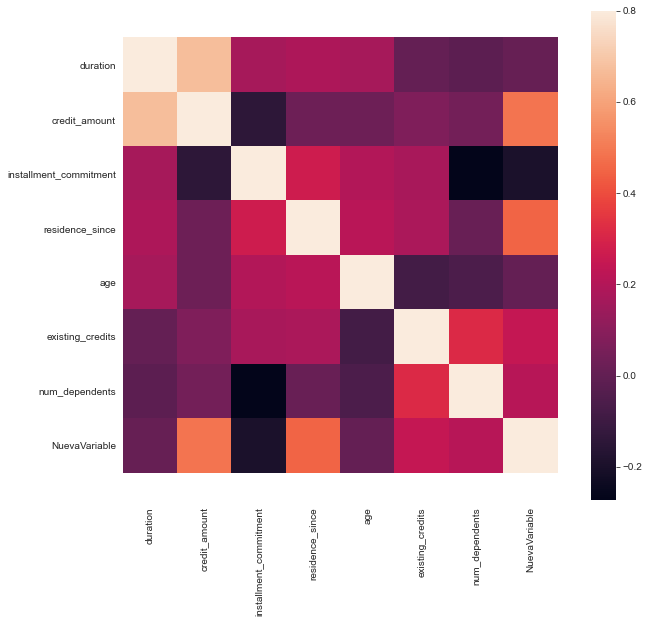

In [24]:
corrmat = creditos.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

### 9.	Obtenga la tabla de relación de frecuencias entre los atributos job y purpose.

In [25]:
pd.crosstab(index=creditos["job"], 
            columns=creditos["purpose"], margins=True)

purpose,business,education,furniture_equipment,new_car,other,radio_tv,repairs,used_car,All
job,,,,,,,,,
high qualif_self emp_mgmt,1,2,1,1,1,0,0,1,7
skilled,3,3,7,6,0,10,1,3,33
unemp_unskilled non res,0,0,0,0,1,0,0,0,1
unskilled resident,0,0,3,3,0,3,0,0,9
All,4,5,11,10,2,13,1,4,50


### 10.	Mapear a valores diferentes para atributos own_telephone, foreign_worker.

In [26]:
fonodic = {'yes': 1, 'none': 0}
creditos['TelefonoPropio'] = creditos['own_telephone'].map(fonodic)
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,num_dependents,own_telephone,foreign_worker,class,NuevaVariable,plazo,TipoMonto,Edad,dependientes,TelefonoPropio
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,2,yes,yes,good,285.833333,mediano,minimo,adulto,dos,1
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,1,yes,yes,good,381.875000,largo,minimo,adulto,uno,1
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,1,none,yes,good,210.333333,corto,minimo,joven,uno,0
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,1,none,yes,good,206.000000,corto,minimo,adulto mayor,uno,0
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,1,none,yes,good,244.833333,mediano,minimo,adulto,uno,0


In [27]:
trabajador = {'yes': 1, 'no': 0}
creditos['TrabajorExtranjero'] = creditos['foreign_worker'].map(trabajador)
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,own_telephone,foreign_worker,class,NuevaVariable,plazo,TipoMonto,Edad,dependientes,TelefonoPropio,TrabajorExtranjero
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,yes,yes,good,285.833333,mediano,minimo,adulto,dos,1,1
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,yes,yes,good,381.875000,largo,minimo,adulto,uno,1,1
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,none,yes,good,210.333333,corto,minimo,joven,uno,0,1
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,none,yes,good,206.000000,corto,minimo,adulto mayor,uno,0,1
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,none,yes,good,244.833333,mediano,minimo,adulto,uno,0,1


### 11.	Normalizar el campo instalment_commitment

In [28]:
campo = ['installment_commitment']
x_array = np.array(creditos['installment_commitment'])
normalized_X = preprocessing.normalize([x_array])
normalized_df = pd.DataFrame(normalized_X.flatten(), columns=campo)
normalized_df.head()

,installment_commitment
0,0.134704
1,0.044901
2,0.134704
3,0.179605
4,0.179605


### 12.	Estandarizar el campo instalment_commitment 

In [29]:
campo = ['installment_commitment']
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(creditos[campo])
scaled_df = pd.DataFrame(scaled_df, columns=campo)
scaled_df.head()

,installment_commitment
0,0.037165
1,-1.821071
2,0.037165
3,0.966282
4,0.966282


### 13.	De los gráficos Boxplot obtenidos quitar outliers por medio de Inter-quartil range

In [30]:
def rm_IQR_outliers(df, var):
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    h = 3*iqr # originally 1.5
    df.loc[df[var] > q3+h, var] = q3+h
    df.loc[df[var] < q1-h, var] = q1-h

    

In [31]:
creditos.credit_amount.describe()

count       50.000000
mean      3156.920000
std       3093.602812
min        448.000000
25%       1283.250000
50%       2136.000000
75%       3647.000000
max      18424.000000
Name: credit_amount, dtype: float64

In [32]:
rm_IQR_outliers(creditos, 'credit_amount')
creditos.credit_amount.describe()

count       50.000000
mean      3003.205000
std       2441.812464
min        448.000000
25%       1283.250000
50%       2136.000000
75%       3647.000000
max      10738.250000
Name: credit_amount, dtype: float64

### 14.	Utilice One-hot encoding en campo purpose.

In [33]:
columna = ["purpose"]
proposito = pd.get_dummies(creditos, prefix_sep="_",
                              columns=columna)
proposito.head()

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,...,TelefonoPropio,TrabajorExtranjero,purpose_business,purpose_education,purpose_furniture_equipment,purpose_new_car,purpose_other,purpose_radio_tv,purpose_repairs,purpose_used_car
0,no_checking,24,existing_paid,3430.0,between_500_1000,>=7,3,male single,none,2,...,1,1,0,0,0,0,0,1,0,0
1,no_checking,48,critical_other_existing_credit,6110.0,less_th_100,1<=X<4,1,male single,none,3,...,1,1,0,1,0,0,0,0,0,0
2,no_checking,12,existing_paid,1262.0,less_th_100,1<=X<4,3,male single,none,2,...,0,1,0,0,0,0,0,1,0,0
3,no_checking,12,critical_other_existing_credit,618.0,less_th_100,>=7,4,male single,none,4,...,0,1,0,0,0,0,0,1,0,0
4,no_checking,24,existing_paid,1469.0,between_100_500,>=7,4,male mar_wid,none,4,...,0,1,0,0,0,1,0,0,0,0


### 15.	Obtenga las instancias que cumplan la condición de un monto de crédito mayor a 3000

In [34]:
creditos[creditos['credit_amount']>3000]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,own_telephone,foreign_worker,class,NuevaVariable,plazo,TipoMonto,Edad,dependientes,TelefonoPropio,TrabajorExtranjero
0,no_checking,24,existing_paid,radio_tv,3430.00,between_500_1000,>=7,3,male single,none,...,yes,yes,good,285.833333,mediano,minimo,adulto,dos,1,1
1,no_checking,48,critical_other_existing_credit,education,6110.00,less_th_100,1<=X<4,1,male single,none,...,yes,yes,good,381.875000,largo,minimo,adulto,uno,1,1
5,less_th_0,12,critical_other_existing_credit,new_car,3499.00,less_th_100,1<=X<4,3,female div_dep_mar,'co applicant',...,none,yes,bad,583.166667,corto,minimo,joven,uno,0,1
9,no_checking,27,delayed_previously,business,5117.00,less_th_100,4<=X<7,3,male single,none,...,none,yes,good,758.074074,mediano,minimo,joven,uno,0,1
10,less_th_0,30,critical_other_existing_credit,used_car,10623.00,less_th_100,>=7,3,male single,none,...,yes,yes,good,1416.400000,mediano,normal,adulto,dos,1,1
12,less_th_0,48,no_credits_all_paid,used_car,4605.00,less_th_100,>=7,3,male single,none,...,none,yes,bad,383.750000,largo,minimo,joven,dos,0,1
15,between_0_200,48,existing_paid,other,5381.00,no_known_savings,unemployed,3,male single,none,...,yes,yes,good,448.416667,largo,minimo,adulto,uno,1,1
23,less_th_0,36,existing_paid,furniture_equipment,3620.00,less_th_100,1<=X<4,1,male single,guarantor,...,none,yes,good,201.111111,mediano,minimo,adulto,dos,0,1
31,no_checking,15,existing_paid,education,4623.00,between_100_500,1<=X<4,3,male single,none,...,yes,yes,bad,616.400000,corto,minimo,adulto,uno,1,1
32,less_th_0,48,existing_paid,education,7476.00,less_th_100,4<=X<7,4,male single,none,...,yes,yes,good,155.750000,largo,normal,adulto,uno,1,1


### 16.	Obtenga las instancias que cumplen con la condición de que job sea igual a “skilled” y que el monto de crédito sea mayor a 2000.

In [35]:
creditos[(creditos['job']=='skilled') & (creditos['credit_amount']>2000)]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,own_telephone,foreign_worker,class,NuevaVariable,plazo,TipoMonto,Edad,dependientes,TelefonoPropio,TrabajorExtranjero
0,no_checking,24,existing_paid,radio_tv,3430.0,between_500_1000,>=7,3,male single,none,...,yes,yes,good,285.833333,mediano,minimo,adulto,dos,1,1
1,no_checking,48,critical_other_existing_credit,education,6110.0,less_th_100,1<=X<4,1,male single,none,...,yes,yes,good,381.875000,largo,minimo,adulto,uno,1,1
5,less_th_0,12,critical_other_existing_credit,new_car,3499.0,less_th_100,1<=X<4,3,female div_dep_mar,'co applicant',...,none,yes,bad,583.166667,corto,minimo,joven,uno,0,1
9,no_checking,27,delayed_previously,business,5117.0,less_th_100,4<=X<7,3,male single,none,...,none,yes,good,758.074074,mediano,minimo,joven,uno,0,1
12,less_th_0,48,no_credits_all_paid,used_car,4605.0,less_th_100,>=7,3,male single,none,...,none,yes,bad,383.750000,largo,minimo,joven,dos,0,1
21,no_checking,24,critical_other_existing_credit,repairs,2058.0,less_th_100,1<=X<4,4,male div_sep,none,...,yes,yes,good,171.500000,mediano,minimo,adulto,uno,1,1
23,less_th_0,36,existing_paid,furniture_equipment,3620.0,less_th_100,1<=X<4,1,male single,guarantor,...,none,yes,good,201.111111,mediano,minimo,adulto,dos,0,1
25,no_checking,24,existing_paid,new_car,2255.0,no_known_savings,<1,4,male single,none,...,none,yes,good,93.958333,mediano,minimo,adulto mayor,uno,0,1
29,less_th_0,9,critical_other_existing_credit,new_car,2799.0,less_th_100,1<=X<4,2,male single,none,...,none,yes,good,622.000000,corto,minimo,adulto,dos,0,1
34,between_0_200,24,existing_paid,radio_tv,2896.0,between_100_500,<1,2,male single,none,...,none,yes,good,120.666667,mediano,minimo,joven,uno,0,1


### 17.	Obtenga suma total del camp credit_amount agrupado por el campo purpose “new car”.

In [54]:
newcar= creditos[['credit_amount','purpose']].groupby('purpose').agg({'credit_amount':'sum'}).reset_index()
newcar[newcar["purpose"]=="new_car"]

,purpose,credit_amount
3,new_car,22752.0


### 18.	Obtenga age y class para los registros que tienen campo purpose “education” y housing “for_free”.

In [37]:
creditosAux=creditos[(creditos['purpose']=='education')&(creditos['housing']=='for_free')]
creditosAux[['age','class']]

,age,class
1,31,good
32,50,good
47,42,bad


### 19.	Obtenga el total y el promedio de credit amount agrupado por housing y class.

In [55]:
creditos[['credit_amount','housing','class']].groupby(['housing','class']).agg(['sum','mean']).reset_index()

housing class credit_amount             
                            sum         mean
0  for_free   bad      10893.00  5446.500000
1  for_free  good      32168.00  6433.600000
2       own   bad      22109.25  3684.875000
3       own  good      68789.00  2292.966667
4      rent   bad       9930.00  3310.000000
5      rent  good       6271.00  1567.750000